In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [ ]:
!apt-get update
!apt-get install -y libsndfile1

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsndfile1 is already the newest version (1.0.31-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
ravdess = "/content/drive/MyDrive/actor_50/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['03-02-04-01-06-150-04-01-00-14-11.wav', '03-02-04-01-06-150-04-01-00-14-08.wav', '03-02-04-01-07-150-04-01-00-14-02.wav', '03-02-04-01-06-150-04-01-00-14-10.wav', '03-02-04-01-06-150-04-01-00-14-09.wav', '03-02-04-01-07-150-04-01-00-14-03.wav', '03-02-04-01-06-150-04-01-00-14-06.wav', '03-02-04-01-06-150-04-01-00-14-07.wav', '03-02-04-01-07-150-04-01-00-14-01.wav', '03-02-04-01-06-150-04-01-00-14-05.wav', '03-02-04-01-07-150-04-01-00-14-08.wav', '03-02-04-01-09-150-04-01-00-14-08.wav', '03-02-04-01-09-150-04-01-00-14-03.wav', '03-02-04-01-09-150-02-01-00-14-03.wav', '03-02-04-01-09-150-04-01-00-14-05.wav', '03-02-04-01-08-150-04-01-00-14-01.wav', '03-02-04-01-08-150-04-01-00-14-04.wav', '03-02-04-01-08-150-04-01-00-14-02.wav', '03-02-04-01-08-150-04-01-00-14-05.wav', '03-02-04-01-09-150-04-01-00-14-06.wav', '03-02-04-01-07-150-04-01-00-14-04.wav', '03-02-04-01-09-150-02-01-00-14-04.wav', '03-02-04-01-09-150-02-01-00-14-07.wav', '03-02-04-01-09-150-04-01-00-14-07.wav', '03-02-04-01-09

In [ ]:
file_emotion = []
file_path = []
for f in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    #actor = os.listdir(ravdess + i)
   # for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess+f)

In [ ]:
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)


03
/content/drive/MyDrive/actor_50/03-02-04-01-06-150-04-01-00-14-11.wav
7
03-01-07-01-20-200-05-02-01-12.wav


In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'boredom', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise',11:'pain',17:'excited'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...
1      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...
2      sad  /content/drive/MyDrive/actor_50/03-02-04-01-07...
3      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...
4      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...
______________________________________________
    Emotions                                               Path
509  disgust  /content/drive/MyDrive/actor_50/03-02-07-01-02...
510  disgust  /content/drive/MyDrive/actor_50/03-02-07-01-09...
511  disgust  /content/drive/MyDrive/actor_50/03-01-07-01-04...
512  disgust  /content/drive/MyDrive/actor_50/03-01-07-01-19...
513  disgust  /content/drive/MyDrive/actor_50/03-01-07-01-20...
_______________________________________________
happy      160
sad        130
angry      127
disgust     67
calm        30
Name: Emotions, dtype: int64


In [ ]:
data_path = pd.concat([ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...
1      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...
2      sad  /content/drive/MyDrive/actor_50/03-02-04-01-07...
3      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...
4      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...

In [ ]:
print(data_path.Emotions.value_counts())


happy      160
sad        130
angry      127
disgust     67
calm        30
Name: Emotions, dtype: int64


In [ ]:
data,sr = librosa.load(file_path[0])
sr

22050

In [ ]:
ipd.Audio(data,rate=sr)

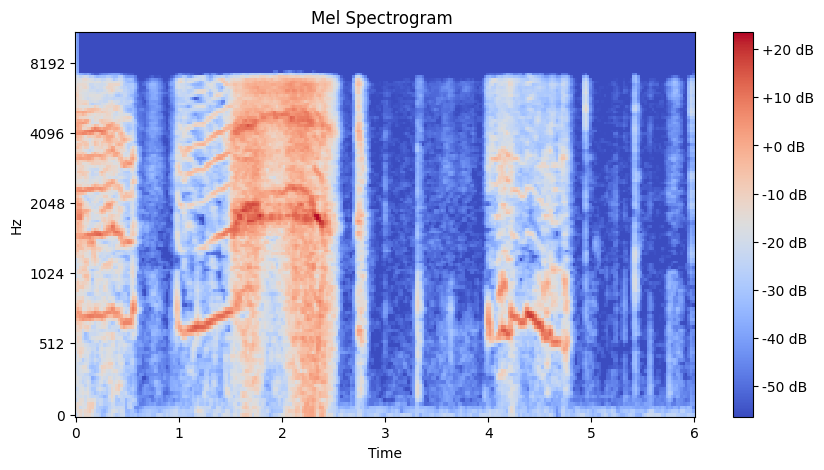

In [ ]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

In [ ]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sr, n_steps=0.7):
    return librosa.effects.pitch_shift(data,sr=sr,n_steps=n_steps)

In [ ]:

import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

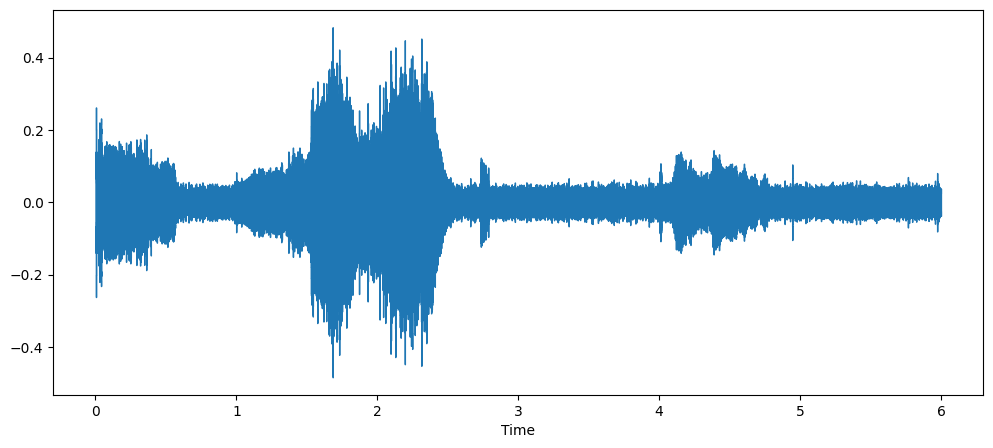

In [ ]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [ ]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


  Emotions                                               Path
0      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...
1      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...
2      sad  /content/drive/MyDrive/actor_50/03-02-04-01-07...
3      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...
4      sad  /content/drive/MyDrive/actor_50/03-02-04-01-06...


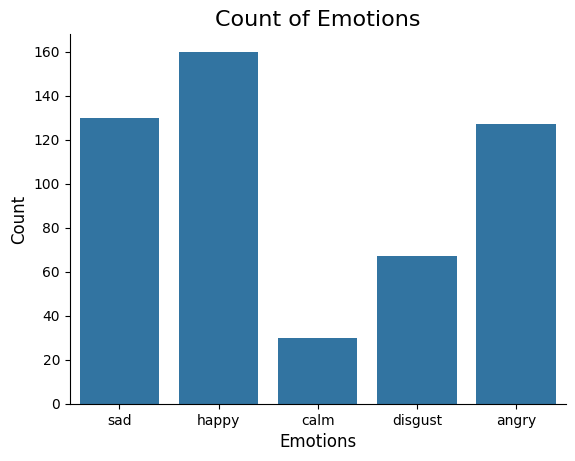

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the structure of your DataFrame
print(data_path.head())

# Assuming 'Emotions' is the correct column name, modify your code accordingly
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [ ]:
pip install --upgrade librosa


In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)

    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr, n_fft=frame_length,hop_length=hop_length)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [ ]:
pip install pysoundfile

In [ ]:
pip install pysoundfile

In [ ]:
pip install --force-reinstall pysoundfile

  Using cached PySoundFile-0.9.0.post1-py2.py3-none-any.whl (24 kB)
  Using cached cffi-1.16.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (443 kB)
  Using cached pycparser-2.21-py2.py3-none-any.whl (118 kB)
  Attempting uninstall: pycparser
    Found existing installation: pycparser 2.21
    Uninstalling pycparser-2.21:
      Successfully uninstalled pycparser-2.21
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.0
    Uninstalling cffi-1.16.0:
      Successfully uninstalled cffi-1.16.0
  Attempting uninstall: pysoundfile
    Found existing installation: PySoundFile 0.9.0.post1
    Uninstalling PySoundFile-0.9.0.post1:
      Successfully uninstalled PySoundFile-0.9.0.post1


In [ ]:
pip install --upgrade soundfile

In [ ]:
from joblib import Parallel, delayed
import timeit

start = timeit.default_timer()

# Define a function to get features for a single audio file
def process_feature(path, emotion):
    try:
        features = get_features(path)
        X = []
        Y = []
        for ele in features:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
        return X, Y
    except Exception as e:
        print(f"Error processing {path}: {e}")
        return None

paths = data_path.Path
emotions = data_path.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

# Collect the results
X = []
Y = []
for result in results:
    if result:
        x, y = result
        X.extend(x)
        Y.extend(y)

stop =timeit.default_timer()


In [ ]:
len(X), len(Y), data_path.Path.shape

(1400, 1400, (514,))

In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

0         1         2         3         4         5         6  \
0  0.077637  0.122559  0.162109  0.183594  0.206055  0.223633  0.238281   
1  0.222656  0.342773  0.470215  0.480957  0.483887  0.480957  0.460449   
2  0.086426  0.123535  0.170410  0.201172  0.220703  0.236816  0.247559   
3  0.211914  0.333496  0.456543  0.479004  0.473633  0.471680  0.466309   
4  0.112305  0.173828  0.207031  0.178223  0.131348  0.090332  0.096680   

          7         8         9  ...      2367      2368      2369       2370  \
0  0.241211  0.213379  0.183594  ...  1.337397  1.214086  2.509014   2.205696   
1  0.455566  0.440918  0.444824  ... -0.868794  2.742662  3.396049   0.125995   
2  0.236816  0.196289  0.176758  ...  6.053636  5.852387  5.955469   3.853437   
3  0.466309  0.471680  0.466797  ...  7.638451  0.614372 -5.261769  -5.647049   
4  0.122559  0.159180  0.153320  ...  8.221869  8.647097  6.244479  11.724929   

       2371       2372      2373       2374      2375  Emotions  
0  1.935155   1.910624  1.642624   2.958615  3.898271       sad  
1 -5.682825  -4.097118 -1.840508   0.294059  0.090192       sad  
2  1.155232  -1.137610 -0.323749   3.646328  2.670806       sad  
3 -2.343978  -0.542255  0.191665  -0.298954  2.608028       sad  
4 -2.560763  10.651263 -3.762905  10.184031  0.842972       sad  

[5 rows x 2377 columns]

In [ ]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

0         1         2         3         4         5         6  \
0  0.077637  0.122559  0.162109  0.183594  0.206055  0.223633  0.238281   
1  0.222656  0.342773  0.470215  0.480957  0.483887  0.480957  0.460449   
2  0.086426  0.123535  0.170410  0.201172  0.220703  0.236816  0.247559   
3  0.211914  0.333496  0.456543  0.479004  0.473633  0.471680  0.466309   
4  0.112305  0.173828  0.207031  0.178223  0.131348  0.090332  0.096680   

          7         8         9  ...      2367      2368      2369       2370  \
0  0.241211  0.213379  0.183594  ...  1.337397  1.214086  2.509014   2.205696   
1  0.455566  0.440918  0.444824  ... -0.868794  2.742662  3.396049   0.125995   
2  0.236816  0.196289  0.176758  ...  6.053636  5.852387  5.955469   3.853437   
3  0.466309  0.471680  0.466797  ...  7.638451  0.614372 -5.261769  -5.647049   
4  0.122559  0.159180  0.153320  ...  8.221869  8.647097  6.244479  11.724929   

       2371       2372      2373       2374      2375  Emotions  
0  1.935155   1.910624  1.642624   2.958615  3.898271       sad  
1 -5.682825  -4.097118 -1.840508   0.294059  0.090192       sad  
2  1.155232  -1.137610 -0.323749   3.646328  2.670806       sad  
3 -2.343978  -0.542255  0.191665  -0.298954  2.608028       sad  
4 -2.560763  10.651263 -3.762905  10.184031  0.842972       sad  

[5 rows x 2377 columns]

In [ ]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [ ]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(1400, 2377)

In [ ]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [ ]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
print(Y.shape)
X.shape

(1400, 5)


(1400, 2376)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1120, 2376), (1120, 5), (280, 2376), (280, 5))

In [ ]:
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1120, 2376), (1120, 5), (280, 2376), (280, 5))

In [ ]:
!apt-get install -y python3-dev portaudio19-dev
!pip install pyaudio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 1s (207 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ...

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
"""model01=Sequential()
model01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.3))
model01.add(LSTM(128))
#model01.add(Dropout(0.3))
model01.add(Dense(7,activation = 'softmax'))
model01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model01.summary()"""

"model01=Sequential()\nmodel01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))\nmodel01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.3))\nmodel01.add(LSTM(128))\n#model01.add(Dropout(0.3))\nmodel01.add(Dense(7,activation = 'softmax'))\nmodel01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])\nmodel01.summary()"

In [ ]:
"""hist=model01.fit(X_train, y_train,
            epochs=20,
            validation_data=(X_test, y_test),batch_size=64,
            verbose=1)"""

'hist=model01.fit(X_train, y_train,\n            epochs=20,\n            validation_data=(X_test, y_test),batch_size=64,\n            verbose=1)'

In [ ]:
"""print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()"""

'print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")\nepochs = [i for i in range(20)]\nfig , ax = plt.subplots(1,2)\ntrain_acc = hist.history[\'accuracy\']\ntrain_loss = hist.history[\'loss\']\ntest_acc = hist.history[\'val_accuracy\']\ntest_loss = hist.history[\'val_loss\']\n\nfig.set_size_inches(20,6)\nax[0].plot(epochs , train_loss , label = \'Training Loss\')\nax[0].plot(epochs , test_loss , label = \'Testing Loss\')\nax[0].set_title(\'Training & Testing Loss\')\nax[0].legend()\nax[0].set_xlabel("Epochs")\n\nax[1].plot(epochs , train_acc , label = \'Training Accuracy\')\nax[1].plot(epochs , test_acc , label = \'Testing Accuracy\')\nax[1].set_title(\'Training & Testing Accuracy\')\nax[1].legend()\nax[1].set_xlabel("Epochs")\nplt.show()'

In [ ]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((1120, 2376, 1), (1120, 5), (280, 2376, 1), (280, 5))

In [ ]:
from keras.api._v2.keras import layers

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(5, activation='softmax')

])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 2376, 512)         3072      
                                                                 
 batch_normalization_6 (Bat  (None, 2376, 512)         2048      
 chNormalization)                                                
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 1188, 512)         0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_7 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                      

In [ ]:
history = model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64, callbacks=[early_stop, lr_reduction, model_checkpoint])

Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 1.6939 - accuracy: 0.5339

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 43s 644ms/step - loss: 1.6939 - accuracy: 0.5339 - val_loss: 1.7985 - val_accuracy: 0.3179 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 0.6382 - accuracy: 0.7652

18/18 [==============================] - 6s 317ms/step - loss: 0.6382 - accuracy: 0.7652 - val_loss: 2.7400 - val_accuracy: 0.3357 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 0.3697 - accuracy: 0.8732

18/18 [==============================] - 6s 326ms/step - loss: 0.3697 - accuracy: 0.8732 - val_loss: 1.7350 - val_accuracy: 0.3929 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 0.2076 - accuracy: 0.9384

18/18 [==============================] - 6s 320ms/step - loss: 0.2076 - accuracy: 0.9384 - val_loss: 2.2529 - val_accuracy: 0.3964 - lr: 0.0010
Epoch 5/50
18/18 [==============================] - ETA: 0s - loss: 0.1451 - accuracy: 0.9527

18/18 [==============================] - 6s 321ms/step - loss: 0.1451 - accuracy: 0.9527 - val_loss: 2.0809 - val_accuracy: 0.3679 - lr: 0.0010
Epoch 6/50
18/18 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.9563

18/18 [==============================] - 6s 324ms/step - loss: 0.1471 - accuracy: 0.9563 - val_loss: 3.9157 - val_accuracy: 0.3714 - lr: 0.0010
Epoch 7/50
18/18 [==============================] - ETA: 0s - loss: 0.0818 - accuracy: 0.9759

18/18 [==============================] - 6s 307ms/step - loss: 0.0818 - accuracy: 0.9759 - val_loss: 4.1015 - val_accuracy: 0.3786 - lr: 0.0010
Epoch 8/50
18/18 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9732

18/18 [==============================] - 6s 309ms/step - loss: 0.0728 - accuracy: 0.9732 - val_loss: 4.2666 - val_accuracy: 0.3786 - lr: 0.0010
Epoch 9/50
18/18 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9857

18/18 [==============================] - 6s 326ms/step - loss: 0.0536 - accuracy: 0.9857 - val_loss: 6.0498 - val_accuracy: 0.3714 - lr: 0.0010
Epoch 10/50
18/18 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9884

18/18 [==============================] - 6s 309ms/step - loss: 0.0500 - accuracy: 0.9884 - val_loss: 4.7350 - val_accuracy: 0.3714 - lr: 0.0010
Epoch 11/50
18/18 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9911

18/18 [==============================] - 6s 312ms/step - loss: 0.0299 - accuracy: 0.9911 - val_loss: 6.4810 - val_accuracy: 0.3679 - lr: 0.0010
Epoch 12/50
18/18 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9946

18/18 [==============================] - 6s 310ms/step - loss: 0.0265 - accuracy: 0.9946 - val_loss: 6.6190 - val_accuracy: 0.3607 - lr: 0.0010
Epoch 13/50
18/18 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9937

18/18 [==============================] - 6s 311ms/step - loss: 0.0261 - accuracy: 0.9937 - val_loss: 5.2028 - val_accuracy: 0.3607 - lr: 0.0010
Epoch 14/50
18/18 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9911

18/18 [==============================] - 6s 336ms/step - loss: 0.0349 - accuracy: 0.9911 - val_loss: 7.7164 - val_accuracy: 0.3786 - lr: 0.0010
Epoch 15/50
18/18 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9857

18/18 [==============================] - 6s 329ms/step - loss: 0.0384 - accuracy: 0.9857 - val_loss: 6.5232 - val_accuracy: 0.3821 - lr: 0.0010
Epoch 16/50
18/18 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.9857

18/18 [==============================] - 6s 314ms/step - loss: 0.0563 - accuracy: 0.9857 - val_loss: 4.2635 - val_accuracy: 0.3857 - lr: 0.0010
Epoch 17/50
18/18 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9839

18/18 [==============================] - 6s 332ms/step - loss: 0.0543 - accuracy: 0.9839 - val_loss: 4.5276 - val_accuracy: 0.4036 - lr: 0.0010
Epoch 18/50
18/18 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9929

18/18 [==============================] - 6s 314ms/step - loss: 0.0327 - accuracy: 0.9929 - val_loss: 4.8042 - val_accuracy: 0.3786 - lr: 0.0010
Epoch 19/50
18/18 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9920

18/18 [==============================] - 6s 339ms/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 2.0181 - val_accuracy: 0.4536 - lr: 0.0010
Epoch 20/50
18/18 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9937

18/18 [==============================] - 6s 333ms/step - loss: 0.0224 - accuracy: 0.9937 - val_loss: 3.4027 - val_accuracy: 0.4286 - lr: 0.0010
Epoch 21/50
18/18 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9964

18/18 [==============================] - 6s 331ms/step - loss: 0.0181 - accuracy: 0.9964 - val_loss: 5.3262 - val_accuracy: 0.4143 - lr: 0.0010
Epoch 22/50
18/18 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9955

18/18 [==============================] - 6s 335ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 2.6005 - val_accuracy: 0.4786 - lr: 0.0010
Epoch 23/50
18/18 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9955

18/18 [==============================] - 6s 349ms/step - loss: 0.0172 - accuracy: 0.9955 - val_loss: 3.7684 - val_accuracy: 0.5036 - lr: 0.0010
Epoch 24/50
18/18 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9929

18/18 [==============================] - 6s 319ms/step - loss: 0.0176 - accuracy: 0.9929 - val_loss: 7.7779 - val_accuracy: 0.4464 - lr: 0.0010
Epoch 25/50
18/18 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9937

18/18 [==============================] - 6s 319ms/step - loss: 0.0178 - accuracy: 0.9937 - val_loss: 5.1832 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 26/50
18/18 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 0.9937

18/18 [==============================] - 6s 357ms/step - loss: 0.0279 - accuracy: 0.9937 - val_loss: 3.3123 - val_accuracy: 0.5571 - lr: 0.0010
Epoch 27/50
18/18 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 0.9893

18/18 [==============================] - 6s 337ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 2.0351 - val_accuracy: 0.6571 - lr: 0.0010
Epoch 28/50
18/18 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9866

18/18 [==============================] - 6s 334ms/step - loss: 0.0357 - accuracy: 0.9866 - val_loss: 1.7335 - val_accuracy: 0.6964 - lr: 0.0010
Epoch 29/50
18/18 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9768

18/18 [==============================] - 6s 337ms/step - loss: 0.0656 - accuracy: 0.9768 - val_loss: 1.5431 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 30/50
18/18 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9848

18/18 [==============================] - 6s 320ms/step - loss: 0.0415 - accuracy: 0.9848 - val_loss: 2.6217 - val_accuracy: 0.5929 - lr: 0.0010
Epoch 31/50
18/18 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9857

18/18 [==============================] - 6s 320ms/step - loss: 0.0378 - accuracy: 0.9857 - val_loss: 1.5070 - val_accuracy: 0.6964 - lr: 0.0010
Epoch 32/50
18/18 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9920

18/18 [==============================] - 6s 343ms/step - loss: 0.0294 - accuracy: 0.9920 - val_loss: 1.2698 - val_accuracy: 0.7607 - lr: 0.0010
Epoch 33/50
18/18 [==============================] - ETA: 0s - loss: 0.0282 - accuracy: 0.9893

18/18 [==============================] - 6s 337ms/step - loss: 0.0282 - accuracy: 0.9893 - val_loss: 0.8825 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 34/50
18/18 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9973

18/18 [==============================] - 6s 361ms/step - loss: 0.0140 - accuracy: 0.9973 - val_loss: 0.4579 - val_accuracy: 0.8786 - lr: 0.0010
Epoch 35/50
18/18 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9955

18/18 [==============================] - 6s 337ms/step - loss: 0.0104 - accuracy: 0.9955 - val_loss: 0.5509 - val_accuracy: 0.8607 - lr: 0.0010
Epoch 36/50
18/18 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9973

18/18 [==============================] - 6s 338ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.6062 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 37/50
18/18 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9973

18/18 [==============================] - 6s 323ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.7999 - val_accuracy: 0.8286 - lr: 0.0010
Epoch 38/50
18/18 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9991

18/18 [==============================] - 6s 338ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.5722 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 39/50
18/18 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9991

18/18 [==============================] - 6s 324ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.5339 - val_accuracy: 0.8714 - lr: 0.0010
Epoch 40/50
18/18 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9973

18/18 [==============================] - 6s 356ms/step - loss: 0.0101 - accuracy: 0.9973 - val_loss: 0.4203 - val_accuracy: 0.8821 - lr: 0.0010
Epoch 41/50
18/18 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000

18/18 [==============================] - 6s 347ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.2897 - val_accuracy: 0.9179 - lr: 0.0010
Epoch 42/50
18/18 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

18/18 [==============================] - 6s 355ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3292 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 43/50
18/18 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000    

18/18 [==============================] - 6s 323ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2996 - val_accuracy: 0.9214 - lr: 0.0010
Epoch 44/50
18/18 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

18/18 [==============================] - 6s 341ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3060 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 45/50
18/18 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

18/18 [==============================] - 6s 324ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2480 - val_accuracy: 0.9214 - lr: 0.0010
Epoch 46/50
18/18 [==============================] - ETA: 0s - loss: 8.3959e-04 - accuracy: 1.0000

18/18 [==============================] - 6s 326ms/step - loss: 8.3959e-04 - accuracy: 1.0000 - val_loss: 0.2093 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 47/50
18/18 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000    

18/18 [==============================] - 6s 342ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 48/50
18/18 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9991

18/18 [==============================] - 6s 339ms/step - loss: 0.0018 - accuracy: 0.9991 - val_loss: 0.1796 - val_accuracy: 0.9607 - lr: 0.0010
Epoch 49/50
18/18 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

18/18 [==============================] - 6s 327ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1919 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 50/50
18/18 [==============================] - ETA: 0s - loss: 8.8548e-04 - accuracy: 1.0000

18/18 [==============================] - 6s 325ms/step - loss: 8.8548e-04 - accuracy: 1.0000 - val_loss: 0.1865 - val_accuracy: 0.9464 - lr: 0.0010


In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")
print("Accuracy of our model on training data : " , model.evaluate(x_traincnn,y_train)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

9/9 [==============================] - 1s 55ms/step - loss: 0.1865 - accuracy: 0.9464
Accuracy of our model on test data :  94.64285969734192 %
35/35 [==============================] - 2s 48ms/step - loss: 2.4739e-04 - accuracy: 1.0000
Accuracy of our model on training data :  100.0 %


In [ ]:
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

9/9 [==============================] - 1s 50ms/step


Predicted Labels Actual Labels
0            happy         happy
1              sad           sad
2              sad           sad
3            happy         happy
4              sad           sad
5            happy         happy
6              sad           sad
7            happy         happy
8             calm          calm
9            happy         happy

In [ ]:
df0

Predicted Labels Actual Labels
0              happy         happy
1                sad           sad
2                sad           sad
3              happy         happy
4                sad           sad
..               ...           ...
275              sad           sad
276          disgust       disgust
277              sad           sad
278              sad           sad
279              sad           sad

[280 rows x 2 columns]

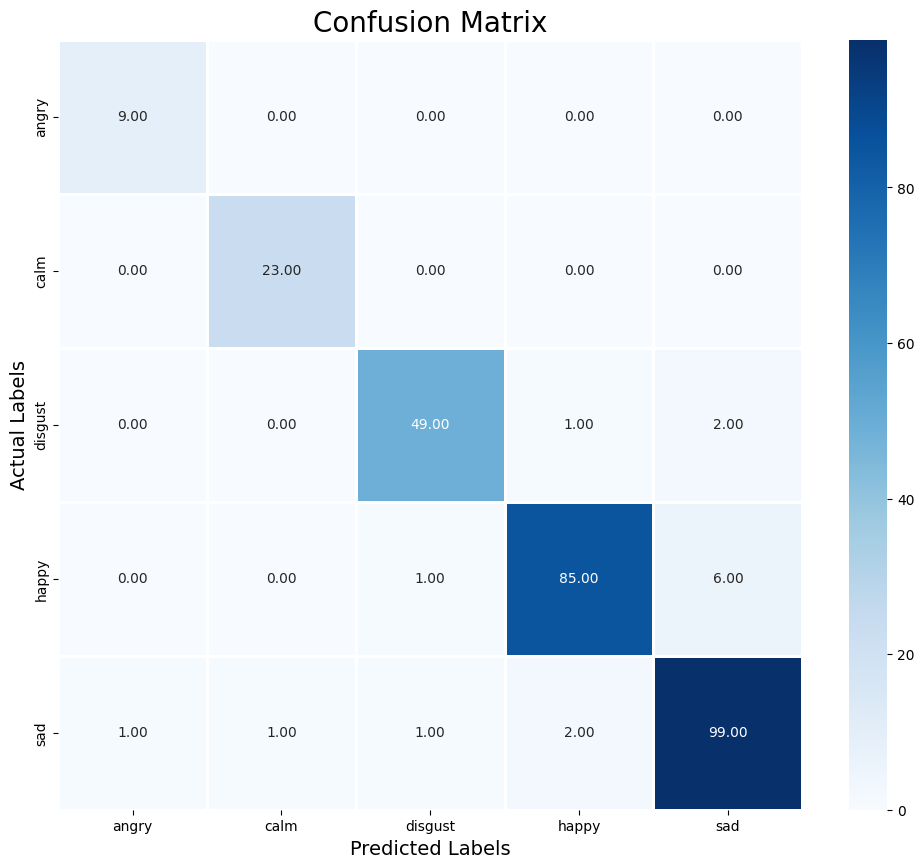

              precision    recall  f1-score   support

       angry       0.90      1.00      0.95         9
        calm       0.96      1.00      0.98        23
     disgust       0.96      0.94      0.95        52
       happy       0.97      0.92      0.94        92
         sad       0.93      0.95      0.94       104

    accuracy                           0.95       280
   macro avg       0.94      0.96      0.95       280
weighted avg       0.95      0.95      0.95       280



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [ ]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)

    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr, n_fft=frame_length,hop_length=hop_length)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [ ]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)

    return final_result

In [ ]:
from google.colab import files
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Upload the audio file
uploaded = files.upload()

# Get the file path dynamically
res = list(uploaded.keys())[0]
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])


Saving baby-giggle-85158.mp3 to baby-giggle-85158.mp3


In [ ]:

# Load the audio file
audio, sr = librosa.load(res)
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=audio, sr=sr)
ipd.Audio(audio,rate=sr)



In [ ]:
prediction(res)

1/1 [==============================] - 0s 30ms/step
happy


In [ ]:
get_predict_feat(res)

In [ ]:
from google.colab import files

import librosa
import librosa.display
import matplotlib.pyplot as plt


# Your plotting code here
plt.show()

# Upload the audio file
uploaded = files.upload()

# Get the file path dynamically
r = list(uploaded.keys())[0]

# Load the audio file


Saving 03-02-04-01-14-50-04-01-00-14-01.wav to 03-02-04-01-14-50-04-01-00-14-01.wav


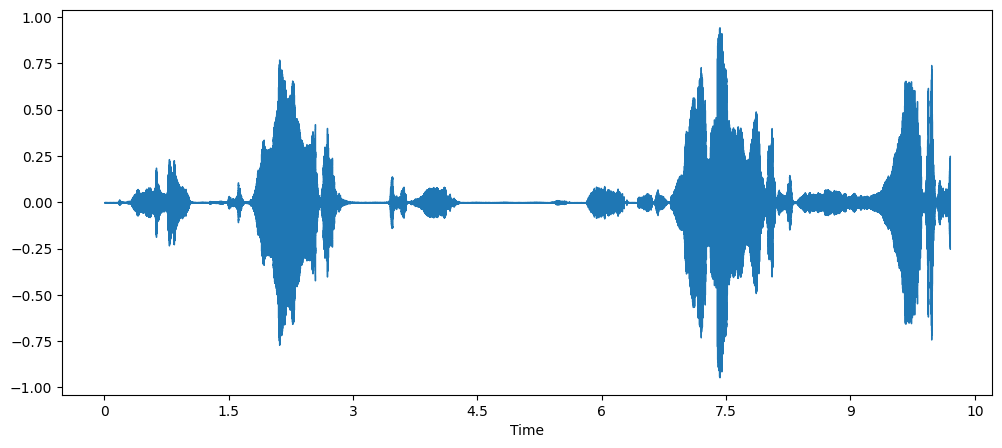

In [ ]:
# Load the audio file
audio, sr = librosa.load(r)
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=audio, sr=sr)
ipd.Audio(audio,rate=sr)

In [ ]:
prediction(r)

1/1 [==============================] - 0s 30ms/step
disgust


In [ ]:
from google.colab import files

import librosa
import librosa.display
import matplotlib.pyplot as plt


# Your plotting code here
plt.show()

# Upload the audio file
uploaded = files.upload()

# Get the file path dynamically
result = list(uploaded.keys())[0]

# Load the audio file

Saving 03-02-04-01-02-200-05-02-01-34.wav to 03-02-04-01-02-200-05-02-01-34.wav


In [ ]:
# Load the audio file
audio, sr = librosa.load(result)
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=audio, sr=sr)
ipd.Audio(audio,rate=sr)

In [ ]:
prediction(result)

1/1 [==============================] - 0s 25ms/step
sad


In [ ]:
from google.colab import files

import librosa
import librosa.display
import matplotlib.pyplot as plt


# Your plotting code here
plt.show()

# Upload the audio file
uploaded = files.upload()

# Get the file path dynamically
result1 = list(uploaded.keys())[0]

# Load the audio file

Saving 03-02-06-01-50-150-04-01-00-16.wav to 03-02-06-01-50-150-04-01-00-16.wav


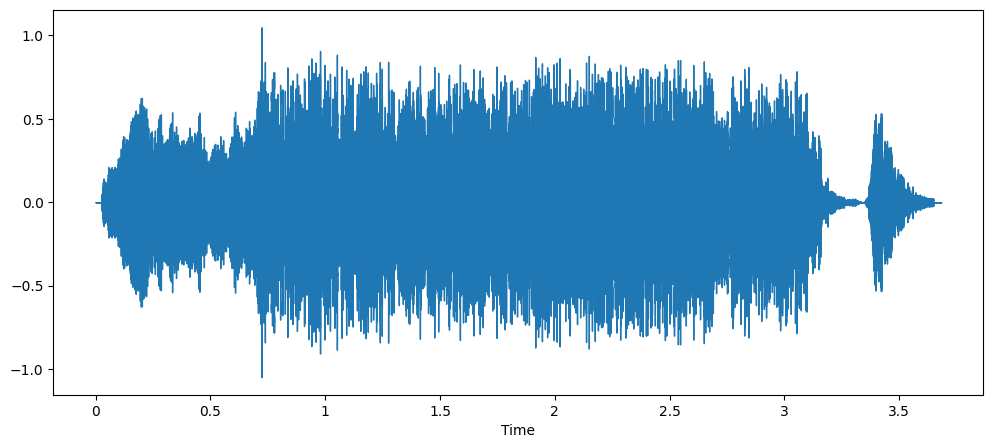

In [ ]:
audio, sr = librosa.load(result1)
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=audio, sr=sr)
ipd.Audio(audio,rate=sr)

In [ ]:
prediction(result1)

1/1 [==============================] - 0s 30ms/step
disgust


Saving 03-01-02-01-20-200-05-02-01-12.wav to 03-01-02-01-20-200-05-02-01-12.wav


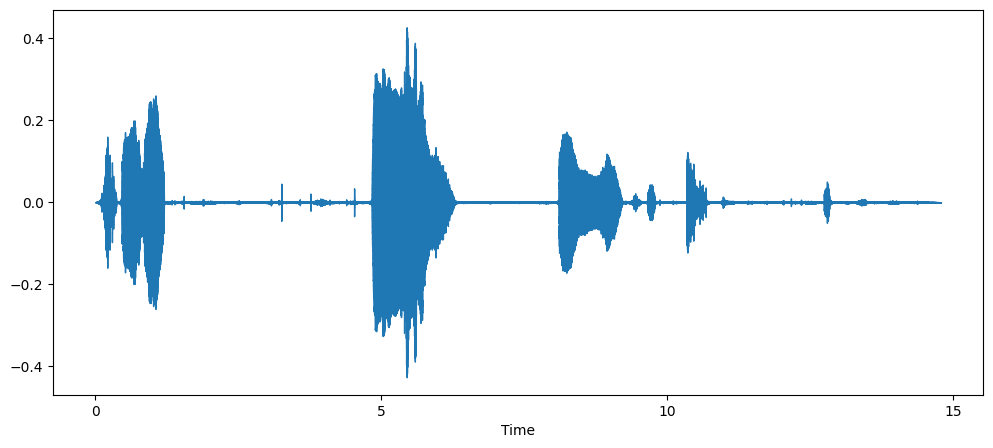

In [ ]:
from google.colab import files

import librosa
import librosa.display
import matplotlib.pyplot as plt


# Your plotting code here
plt.show()

# Upload the audio file
uploaded = files.upload()

# Get the file path dynamically
result2 = list(uploaded.keys())[0]

# Load the audio file
audio, sr = librosa.load(result2)
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=audio, sr=sr)
ipd.Audio(audio,rate=sr)


In [ ]:
prediction(result2)

1/1 [==============================] - 0s 29ms/step
calm


In [ ]:
from google.colab import files

import librosa
import librosa.display
import matplotlib.pyplot as plt


# Your plotting code here
plt.show()

# Upload the audio file
uploaded = files.upload()

# Get the file path dynamically
result3 = list(uploaded.keys())[0]

# Load the audio file
audio, sr = librosa.load(result3)
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=audio, sr=sr)
ipd.Audio(audio,rate=sr)


KeyboardInterrupt: 

In [ ]:
prediction(result3)

1/1 [==============================] - 0s 31ms/step
happy
